In [1]:
import torch
import gc
torch.cuda.empty_cache()
gc.collect()

20

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2025-08-31 23:58:43.250684: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-31 23:58:43.282556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756664923.297511   17628 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756664923.303604   17628 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756664923.321119   17628 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


I0000 00:00:1756664927.570629   17628 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1194 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
#from tensorflow.keras.datasets import te

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 81.5   72.75  84.5 ]
   [162.   151.   165.  ]
   [165.75 154.75 168.75]
   ...
   [158.75 149.75 170.75]
   [175.   166.   187.  ]
   [176.   167.   188.  ]]

  [[ 84.75  75.5   87.75]
   [164.5  153.5  167.5 ]
   [163.5  152.5  166.5 ]
   ...
   [160.   151.   172.  ]
   [172.75 163.75 184.75]
   [156.25 147.25 168.25]]

  [[ 88.25  78.25  91.25]
   [167.25 156.25 170.25]
   [163.   152.   166.  ]
   ...
   [167.5  158.5  179.5 ]
   [168.25 159.25 180.25]
   [165.   156.   177.  ]]

  ...

  [[ 72.75  63.    75.75]
   [ 98.    87.   103.  ]
   [115.   103.   123.  ]
   ...
   [120.75 106.75 129.75]
   [118.5  104.5  127.5 ]
   [119.75 105.75 128.75]]

  [[ 60.    50.25  63.  ]
   [115.   104.   120.  ]
   [128.25 116.25 136.25]
   ...
   [136.   122.   145.  ]
   [126.25 112.25 135.25]
   [143.75 129.75 152.75]]

  [[ 57.5   47.75  60.5 ]
   [129.   118.   134.  ]
   [137.   125.   145.  ]
   ...
   [119.75 105.75 128.75]
   [115.75 101.75 124.75]
   [139.75 125.75 14

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/home/zer0/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500,activation='relu'))

In [18]:
model.add(Dropout(0.4))

In [19]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


I0000 00:00:1756664931.028088   17700 service.cc:152] XLA service 0x7f9ba80025d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756664931.028119   17700 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-08-31 23:58:51.072643: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756664931.505552   17700 cuda_dnn.cc:529] Loaded cuDNN version 91002
2025-08-31 23:58:52.746857: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1704', 84 bytes spill stores, 84 bytes spill loads

2025-08-31 23:58:52.849447: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusio

   3/2197 ━━━━━━━━━━━━━━━━━━━━ 2:13 61ms/step - accuracy: 0.0451 - loss: 5.3424 

I0000 00:00:1756664942.162287   17700 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4070 - loss: 2.1270

2025-09-01 00:01:16.642888: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1993', 56 bytes spill stores, 56 bytes spill loads

2025-09-01 00:01:16.685514: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1704', 64 bytes spill stores, 64 bytes spill loads

2025-09-01 00:01:17.961407: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 626.88MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-09-01 00:01:22.786419: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 592.72MiB with freed_by_count=0. The caller indicates t

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4070 - loss: 2.1266

2025-09-01 00:01:26.430962: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_209', 740 bytes spill stores, 740 bytes spill loads

2025-09-01 00:01:26.479891: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_209', 204 bytes spill stores, 204 bytes spill loads

2025-09-01 00:01:26.550553: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_209', 380 bytes spill stores, 380 bytes spill loads

2025-09-01 00:01:26.628553: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_209', 900 bytes spill stores, 900 bytes spill loads

2025-09-01 00:01:26.768950: I extern

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 170s 72ms/step - accuracy: 0.6065 - loss: 1.3422 - val_accuracy: 0.8462 - val_loss: 0.4960
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 147s 67ms/step - accuracy: 0.8592 - loss: 0.4429 - val_accuracy: 0.9043 - val_loss: 0.3080
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 149s 68ms/step - accuracy: 0.9131 - loss: 0.2707 - val_accuracy: 0.9288 - val_loss: 0.2162
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 68ms/step - accuracy: 0.9385 - loss: 0.1882 - val_accuracy: 0.9346 - val_loss: 0.1987
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 68ms/step - accuracy: 0.9556 - loss: 0.1387 - val_accuracy: 0.9509 - val_loss: 0.1573
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 68ms/step - accuracy: 0.9632 - loss: 0.1127 - val_accuracy: 0.9620 - val_loss: 0.1221
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 69ms/step - accuracy: 0.9702 - loss: 0.0897 - val_accuracy: 0.9517 - val_loss: 0.1543
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 68ms/step - accuracy: 0.9760 - lo

In [23]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2194/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9882 - loss: 0.0353

2025-09-01 00:24:44.605845: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_209', 188 bytes spill stores, 188 bytes spill loads

2025-09-01 00:24:44.661509: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_209', 368 bytes spill stores, 368 bytes spill loads

2025-09-01 00:24:44.842267: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_209', 1088 bytes spill stores, 1100 bytes spill loads

2025-09-01 00:24:44.868838: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_209', 748 bytes spill stores, 748 bytes spill loads

2025-09-01 00:24:44.880444: I exte

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9894 - loss: 0.0320


In [24]:
print(train_loss,train_acc)

0.0319647490978241 0.9894018173217773


In [25]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9648 - loss: 0.1226


In [26]:
print(val_loss,val_acc)

0.12255290895700455 0.9648303985595703


In [27]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.6064727306365967,
  0.8591791987419128,
  0.9131374955177307,
  0.9384878277778625,
  0.9555729627609253,
  0.9631979465484619,
  0.9702396988868713,
  0.9760295748710632,
  0.9786186814308167,
  0.9816487431526184],
 'loss': [1.3421671390533447,
  0.44286757707595825,
  0.2707168459892273,
  0.18816496431827545,
  0.1387357860803604,
  0.11273650825023651,
  0.08970307558774948,
  0.07367997616529465,
  0.06745943427085876,
  0.05688196048140526],
 'val_accuracy': [0.8462326526641846,
  0.9043364524841309,
  0.9287502765655518,
  0.9346118569374084,
  0.9509446620941162,
  0.9619849920272827,
  0.9516844749450684,
  0.9527088403701782,
  0.9589118957519531,
  0.9648303985595703],
 'val_loss': [0.49601632356643677,
  0.3079761862754822,
  0.21622811257839203,
  0.19867314398288727,
  0.15730048716068268,
  0.12210271507501602,
  0.1543264389038086,
  0.15863904356956482,
  0.13999544084072113,
  0.12255289405584335]}

In [29]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [30]:
training_history.history['val_accuracy']

[0.8462326526641846,
 0.9043364524841309,
 0.9287502765655518,
 0.9346118569374084,
 0.9509446620941162,
 0.9619849920272827,
 0.9516844749450684,
 0.9527088403701782,
 0.9589118957519531,
 0.9648303985595703]

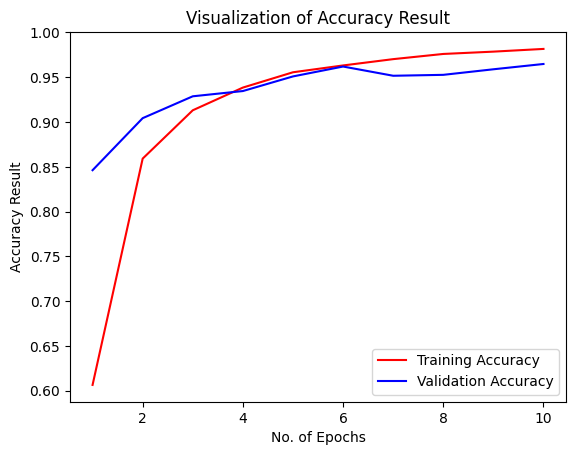

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step


(array([[9.99988675e-01, 8.19124944e-06, 1.26426225e-09, ...,
         2.92010409e-11, 2.68283954e-11, 1.10471216e-11],
        [9.99509096e-01, 3.22070855e-06, 3.03872412e-08, ...,
         8.73438122e-09, 9.30962141e-10, 6.90678981e-09],
        [1.00000000e+00, 2.21050969e-10, 1.12781416e-11, ...,
         7.19753859e-16, 2.77706664e-14, 1.94022359e-12],
        ...,
        [5.30434550e-11, 2.75935144e-16, 1.11748685e-12, ...,
         3.64852593e-12, 1.90034268e-13, 9.99989152e-01],
        [2.50220279e-11, 3.23184638e-15, 4.54616108e-13, ...,
         2.73653079e-11, 8.14257028e-13, 9.99999881e-01],
        [1.12294462e-11, 8.91878056e-14, 1.20739074e-12, ...,
         5.97204100e-12, 8.62082317e-09, 9.99623179e-01]], dtype=float32),
 (17572, 38))

In [35]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [37]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

2025-09-01 00:25:19.435668: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.94      0.96       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.97       440
                                   Apple___healthy       0.98      0.95      0.97       502
                               Blueberry___healthy       0.97      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.94      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

In [41]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[476,   8,   0, ...,   0,   2,   0],
       [  0, 493,   0, ...,   0,   0,   0],
       [  0,   1, 422, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 484,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   1, 446]])

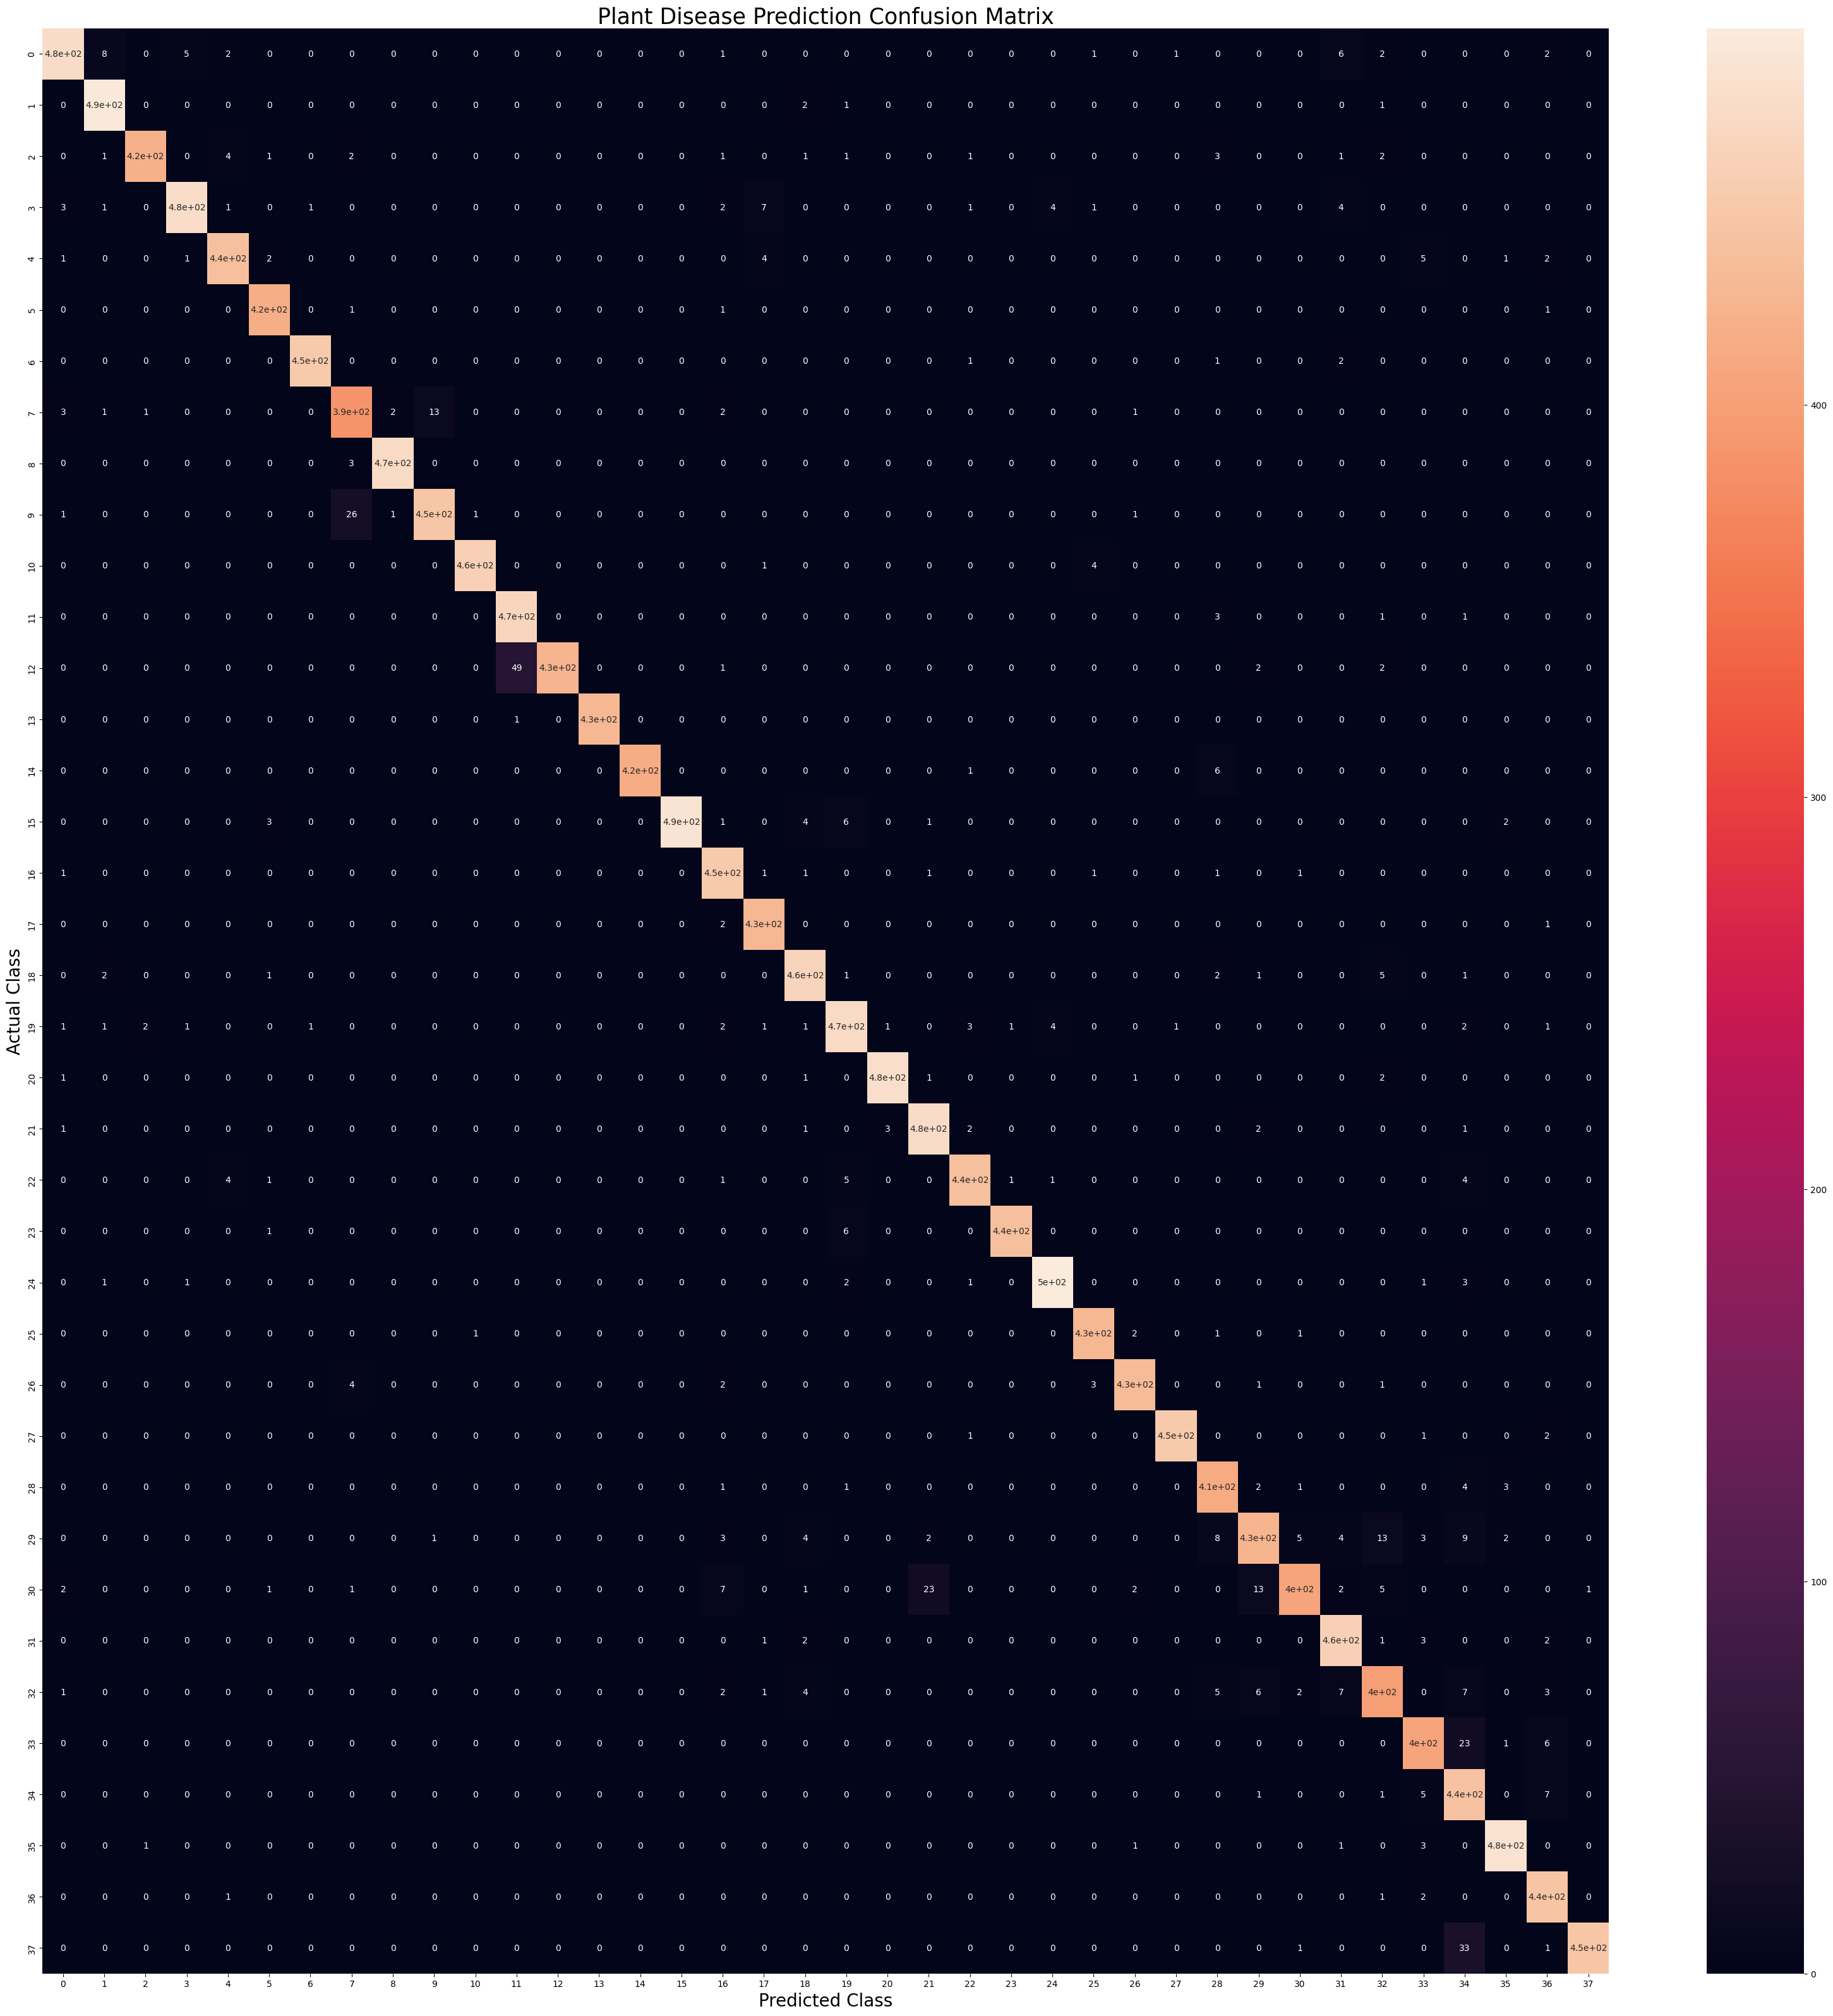

In [42]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()